In [2]:
from openai import OpenAI
import os
MODEL="gpt-4o-mini-2024-07-18"
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

# 0814

## GPT-4o 및 GPT-4o mini 소개
- GPT-4o("o"는 "omni"를 의미)와 GPT-4o mini는 기본적으로 텍스트, 오디오 및 비디오 입력의 조합을 처리하도록 설계된 멀티모달 모델이며 텍스트, 오디오 및 이미지 형식으로 출력을 생성할 수 있습니다. GPT-4o mini는 GPT-4o의 가벼운 버전입니다.

배경
- GPT-4o 이전에는 사용자가 세 개의 별도 모델로 작동하는 Voice Mode를 사용하여 ChatGPT와 상호 작용할 수 있었습니다. GPT-4o는 이러한 기능을 텍스트, 시각 및 오디오에서 학습된 단일 모델로 통합합니다. 이 통합된 접근 방식은 텍스트, 시각 또는 청각 여부에 관계없이 모든 입력이 동일한 신경망에서 응집적으로 처리되도록 합니다. - 시각장애인 서비스를 객체 탐지 모델로 만들었는데 이것이 필요없는 상황이 됨, 별도 모듈 사용해도 되고 멀티 모달 모델 사용해도 됨
- GPT-4o mini는 이 omni 모델 제품군이 더 작고 저렴한 버전으로 제공됩니다. 이 모델은 GPT-3.5 Turbo보다 ​​정확도가 더 높은 동시에 속도가 빠르고 멀티모달 입력 및 출력을 지원합니다.

우리가 배우는 순서

프롬프트 - api - llm모델 순서로 배우고 있는 것



In [5]:
complettion = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. 수학숙제 도우미야"},
        {"role": "user", "content": "2더하기2는?"},
    ]
)

print(complettion.choices[0].message.content)

2 더하기 2는 4입니다.


## GPT-4o mini 모델 이미지 처리
#### 1. GPT-4o mini의 이미지 처리 능력
이미지 처리 및 작업 수행:
- GPT-4o mini는 이미지를 입력받아 해당 이미지에 대해 분석하거나, 그 이미지에 기반한 지능적인 작업을 수행할 수 있습니다. 
- 예를 들어, 이미지를 설명하거나, 이미지의 특정 부분을 이해하고 그것에 대해 질문에 답할 수 있습니다.
이미지를 텍스트와 함께 처리하여 텍스트와 이미지를 결합한 종합적인 분석을 수행할 수 있습니다.

#### 2. 이미지를 제공하는 두 가지 형식
Base64 인코딩
- Base64 인코딩이란?:
  - Base64 인코딩은 이진 데이터를 텍스트 형식으로 변환하는 방법입니다. 이미지 파일과 같은 바이너리 데이터를 텍스트로 인코딩하여 네트워크를 통해 안전하게 전송할 수 있습니다.
  - 이미지를 Base64로 인코딩하면, 텍스트 문자열로 표현된 이미지를 API에 직접 전달할 수 있습니다.
- 사용 예:
  - 이미지를 읽어와서 Base64로 인코딩한 다음, 이를 API 요청의 본문에 포함시켜 GPT-4o mini에 전달합니다.
- 장점:
  - 이미지 파일을 직접 업로드할 필요 없이 텍스트 형태로 쉽게 전송할 수 있습니다.
  - 네트워크 전송 중에 파일이 손상되거나 변조되는 위험을 줄일 수 있습니다.

URL 링크
- URL 링크란?:
  - 이미지가 이미 인터넷에 업로드된 경우, 해당 이미지의 URL을 GPT-4o mini에 제공하여 모델이 해당 이미지를 직접 가져오도록 할 수 있습니다.
  - 이미지의 URL을 API 요청에 포함시키면, 모델이 해당 URL을 통해 이미지를 다운로드하고 분석을 수행합니다.
- 사용 예:
  - 인터넷에 있는 이미지의 URL을 제공하여 GPT-4o mini에 이미지 분석을 요청합니다.
- 장점:
  - 이미지 파일을 업로드할 필요 없이, 인터넷에 있는 이미지를 바로 사용할 수 있습니다.
  - 이미 많은 이미지가 웹에 존재하므로, 별도로 파일을 준비하지 않아도 됩니다.

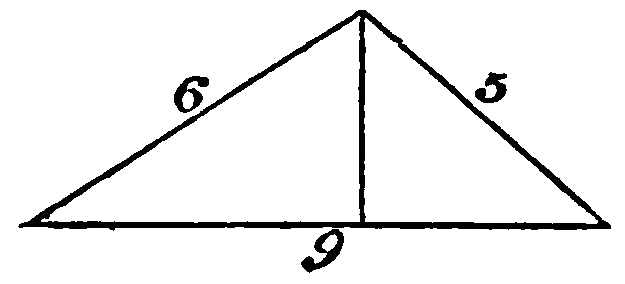

In [4]:
from IPython.display import display, Markdown, Image, Audio, Video
import base64

image_path = r"D:\pythonProject\ML\data\tryangle.png"

display(Image(image_path))

### base64 image processing

In [9]:
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")
    
base64_image = encode_image(image_path)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. 수학숙제 도우미야"},
        {"role": "user", "content": [
            {"type": "text", "text": "삼각형의 넓이를 구하고 싶어."},
            {"type": "image_url", "image_url": base64_image}  # url 데이터 형식 맞춰야함
            ]},
        
    ]
)

print(response.choices[0].message.content)

BadRequestError: Error code: 400 - {'error': {'message': "Invalid type for 'messages[1].content[1].image_url': expected an object, but got a string instead.", 'type': 'invalid_request_error', 'param': 'messages[1].content[1].image_url', 'code': 'invalid_type'}}

In [11]:
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")


base64_image = encode_image(image_path)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. 수학숙제 도우미야"},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "삼각형의 넓이를 구하고 싶어."},
                # "data:image/png;base64," 는 이미지 데이터를 표현하는 방법으로, 이 문자열은 이미지가 png 형식이며, base64로 인코딩되었음을 나타냅니다.
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image}"}},  # data:image/png
            ],
        },
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

삼각형의 넓이를 구하기 위해서는 다음 공식을 사용할 수 있습니다:

\[
\text{넓이} = \frac{1}{2} \times \text{밑변} \times \text{높이}
\]

주어진 삼각형에서 밑변은 9, 높이는 5입니다. 따라서 넓이는 다음과 같이 계산됩니다:

\[
\text{넓이} = \frac{1}{2} \times 9 \times 5 = \frac{45}{2} = 22.5
\]

따라서 삼각형의 넓이는 22.5 제곱 단위입니다.


삼각형의 넓이를 구하기 위해 두 가지 변수를 사용할 수 있습니다. 이 삼각형은 밑변의 길이와 높이를 알 수 있으므로, 다음 공식을 사용할 수 있습니다.

\[
\text{넓이} = \frac{1}{2} \times \text{밑변} \times \text{높이}
\]

여기서 밑변은 9, 높이는 5이므로,

\[
\text{넓이} = \frac{1}{2} \times 9 \times 5 = \frac{1}{2} \times 45 = 22.5
\]

따라서, 이 삼각형의 넓이는 **22.5** 단위 제곱입니다.

MIME 타입(Multipurpose Internet Mail Extensions type)
- 인터넷에서 파일이나 데이터의 형식을 지정하기 위해 사용하는 표준화된 방법
- 예시

  텍스트 파일
    - text/plain: 일반 텍스트 파일.
    - text/html: HTML 파일.

  이미지 파일
    - image/jpeg: JPEG 이미지 파일.
    - image/png: PNG 이미지 파일.
    - image/gif: GIF 이미지 파일.

  오디오 파일
    - audio/mpeg: MP3 오디오 파일.
    - audio/wav: WAV 오디오 파일.

  비디오 파일
    - video/mp4: MP4 비디오 파일.
    - video/webm: WebM 비디오 파일.
    
  응용 프로그램 파일
    - application/json: JSON 데이터 파일.
    - application/pdf: PDF 문서 파일.
    - application/zip: ZIP 압축 파일.



url image processing

In [12]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. 수학숙제 도우미야"},
        {"role": "user", "content": [
            {"type": "text", "text": "삼각형의 넓이를 구하고 싶어."},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}}
            ]},
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

삼각형의 넓이를 구하기 위해서는 다음 공식을 사용할 수 있습니다:

\[
\text{넓이} = \frac{1}{2} \times \text{밑변} \times \text{높이}
\]

주어진 삼각형에서 밑변은 9, 높이는 5입니다. 따라서 넓이는 다음과 같이 계산됩니다:

\[
\text{넓이} = \frac{1}{2} \times 9 \times 5 = \frac{45}{2} = 22.5
\]

따라서 삼각형의 넓이는 22.5 제곱 단위입니다.


In [13]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. 수학숙제 도우미야, 마크 다운 형식 말고 그냥 텍스트로 답변해줘."},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "삼각형의 넓이를 구하고 싶어."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"
                    },
                },
            ],
        },
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

삼각형의 넓이를 구하기 위해서는 다음 공식을 사용할 수 있습니다:

넓이 = (밑변 × 높이) / 2

주어진 삼각형에서 밑변은 9, 높이는 6입니다. 따라서 넓이는 다음과 같이 계산됩니다.

넓이 = (9 × 6) / 2 = 54 / 2 = 27

따라서 삼각형의 넓이는 27입니다.


In [17]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. 수학숙제 도우미야"},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "삼각형의 넓이를 구하고 싶어."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"
                    },
                },
            ],
        },
    ],
    temperature=0.0,
)

print(response.choices[0].message.content.replace("\\", " "))

삼각형의 넓이를 구하기 위해서는 다음 공식을 사용할 수 있습니다:

 [
 text{넓이} =  frac{1}{2}  times  text{밑변}  times  text{높이}
 ]

주어진 삼각형에서 밑변은 9, 높이는 5입니다. 따라서 넓이는 다음과 같이 계산됩니다:

 [
 text{넓이} =  frac{1}{2}  times 9  times 5 =  frac{45}{2} = 22.5
 ]

따라서 삼각형의 넓이는 22.5 제곱 단위입니다.


Q. 주어진 url로 이미지에 대하여 설명하는 기능을 수행하세요


In [18]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. 당신은 미술 큐레이터입니다."},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "그림을 보고 어떤 화풍인지 알려주고, 어느 시대의 작품인지 알려주세요."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                    },
                },
            ],
        },
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

이 이미지는 자연 풍경을 담고 있으며, 부드러운 색조와 조화로운 구성이 특징입니다. 이러한 요소들은 인상파 화풍의 특징과 유사합니다. 인상파는 19세기 후반에 주로 활동한 화가들에 의해 발전하였으며, 자연의 순간적인 빛과 색을 포착하는 데 중점을 두었습니다.

따라서 이 작품은 인상파 화풍의 영향을 받을 수 있으며, 19세기 후반에서 20세기 초의 작품일 가능성이 높습니다.


In [20]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant. 당신은 미술 큐레이터입니다.",
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "그림을 보고 어떤 화풍인지 알려주고, 어느 시대의 작품인지 알려주세요.",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                    },
                },
            ],
        },
    ],
    temperature=1.0,
)

print(response.choices[0].message.content)

제시된 이미지는 자연 풍경을 담고 있으며, 기분 좋은 색조와 부드러운 구름이 인상적입니다. 이러한 경향은 인상파 화풍의 특징과 유사합니다. 인상파는 자연의 빛과 색을 캔버스에 담으려는 시도로 유명하며, 19세기 말과 20세기 초에 주로 활동했습니다.

이러한 스타일의 작업은 일반적으로 1860년대에서 1900년대 초반에 걸쳐 이루어졌습니다. 사진이 일상적인 풍경을 아름답게 담고 있어 현대적인 경향을 보일 수도 있지만, 전반적으로 인상파 화풍의 요소들이 나타나고 있다고 볼 수 있습니다.
61


In [21]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant. 당신은 미술 큐레이터입니다.",
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "그림을 보고 어떤 화풍인지 알려주고, 어느 시대의 작품인지 알려주세요. 또 밤이라면 어떨까요?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                    },
                },
            ],
        },
    ],
    temperature=1.0,
)

print(response.choices[0].message.content)

이 그림은 자연 풍경을 담고 있으며, 맑은 하늘과 넓은 초원이 있는 평화로운 장면을 보여줍니다. 이런 종류의 작품은 일반적으로 인상파 또는 자연주의 화풍과 연결될 수 있습니다. 인상파는 빛과 색채의 변화를 강조하며 자연을 생생하게 표현하는 경향이 있습니다.

작품의 시대는 대개 19세기 후반부터 20세기 초까지의 것으로 보입니다. 이 시기는 인상파와 관련된 중요한 변화가 있었던 시기입니다.

만약 밤의 장면으로 바꾼다면, 하늘은 어두워지고 별이나 달빛이 비치는 분위기를 더할 수 있습니다. 그러면 고요하고 신비로운 느낌을 줄 수 있으며, 밤하늘의 색조와 그림자가 조화롭게 어우러져 새로운 이미지를 만들어낼 것입니다.


위 결과 메시지를 기준으로 이미지 생성하는 것도 의미가 있을 것 같다.

 주요 비디오 처리 단계는 다음과 같습니다:

프레임 추출:
- 코드에서 비디오의 프레임을 추출하여 base64로 인코딩하고, 이를 배열에 저장합니다.
- 이 부분에서 cv2(OpenCV)를 사용하여 비디오 파일을 읽고, 일정 간격으로 프레임을 추출합니다.

오디오 추출:
- MoviePy 라이브러리를 사용하여 비디오에서 오디오를 추출하고, 이를 MP3 파일로 저장합니다.
- 오디오 파일은 나중에 텍스트로 변환(음성 인식)되어 텍스트 분석에 사용될 수 있습니다.

비디오 및 오디오 처리 결과 사용:
- 비디오 프레임을 base64로 인코딩한 후, GPT-4o 모델에 전달하여 질문에 답변하는 데 사용됩니다.
- 오디오 트랜스크립션도 질문 응답에 사용되며, 프레임과 오디오를 결합한 분석도 수행됩니다.

비디오 처리를 위한 설정
- 비디오 처리를 위해 두 개의 파이썬 패키지인 opencv-python과 moviepy를 사용합니다.

In [1]:
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

VIDEO_PATH = r"D:\pythonProject\ML\data\openai_devday.mp4"

In [3]:
# 비디오 파일에서 프레임과 오디오를 추출
def process_video(
    video_path, seconds_per_frame=2
):  # seconds_per_frame: 몇 초마다 프레임을 추출할지를 지정하는 매개변수
    base64Frames = []  # 추출한 프레임을 base64로 인코딩하여 저장할 리스트
    base_video_path, _ = (
        os.path.splitext(  # _ : 확장자 위치, base_video_path : 확장자를 제외한 기본 경로 os.path.splitext 확장자 분리해줌
            video_path
        )
    )

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))  # CAP_PROP_FRAME_COUNT: 비디오 파일의 총 프레임 수 반환 속성
    fps = video.get(cv2.CAP_PROP_FPS)  # CAP_PROP_FPS:비디오의 초당 프레임 수
    frames_to_skip = int(
        fps * seconds_per_frame
    )  # 몇 개의 프레임을 건너뛰고 다음 프레임을 추출할지를 결정 - 영상은 겹치는 프레임이 많아서 이렇게 함
    curr_frame = 0  # 현재 프레임 위치를 나타내는 변수

    # Loop through the video and extract frames at specified sampling rate
    while (
        curr_frame < total_frames - 1
    ):  # 비디오의 끝에 도달할 때까지 지정된 간격에 따라 프레임을 추출
        video.set(
            cv2.CAP_PROP_POS_FRAMES, curr_frame
        )  # 현재 프레임 위치를 curr_frame으로 설정
        success, frame = (
            video.read()
        )  # 현재 프레임을 읽어옵니다. success가 True면 읽기에 성공한 것이고, frame은 읽은 프레임 데이터를 담고 있습니다.

        if not success: # 읽기에 실패하면 루프를 종료
            break
        _, buffer = (
            cv2.imencode(  # 읽어온 프레임을 JPEG 이미지 형식으로 인코딩. buffer는 인코딩된 이미지 데이터
                ".jpg", frame
            )
        )
        base64Frames.append(  # 인코딩된 프레임을 base64Frames 리스트에 추가
            base64.b64encode(buffer).decode("utf-8")
        )
        curr_frame += (
            frames_to_skip  # 다음 프레임 위치로 이동하기 위해 curr_frame을 업데이트
        )
    video.release()  # 비디오 파일을 닫아 자원을 해제

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3"  # 원본 비디오 파일의 경로를 사용하며, 확장자를 .mp3로 변경하여 저장
    clip = VideoFileClip(video_path)  # MoviePy를 사용하여 비디오 파일을 엽니다.
    clip.audio.write_audiofile(
        audio_path, bitrate="32k"
    )  # 비디오 파일에서 오디오를 추출하여 MP3 파일로 저장. bitrate="32k"는 오디오의 비트레이트(음질)를 설정하는 옵션
    clip.audio.close()  # 오디오 및 비디오 파일을 닫아 자원을 해제
    clip.close()

    print(f"Extracted {len(base64Frames)} frames")  # 추출된 프레임의 수를 출력
    print(f"Extracted audio to {audio_path}")  # 추출된 오디오 파일의 경로를 출력
    return base64Frames, audio_path


# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1) #1초마다 프레임 추출

MoviePy - Writing audio in D:\pythonProject\ML\data\openai_devday.mp3


MoviePy - Done.
Extracted 211 frames
Extracted audio to D:\pythonProject\ML\data\openai_devday.mp3


비디오에서 추출한 프레임과 오디오를 사용하여 gpt-4o mini으로 비디오 요약

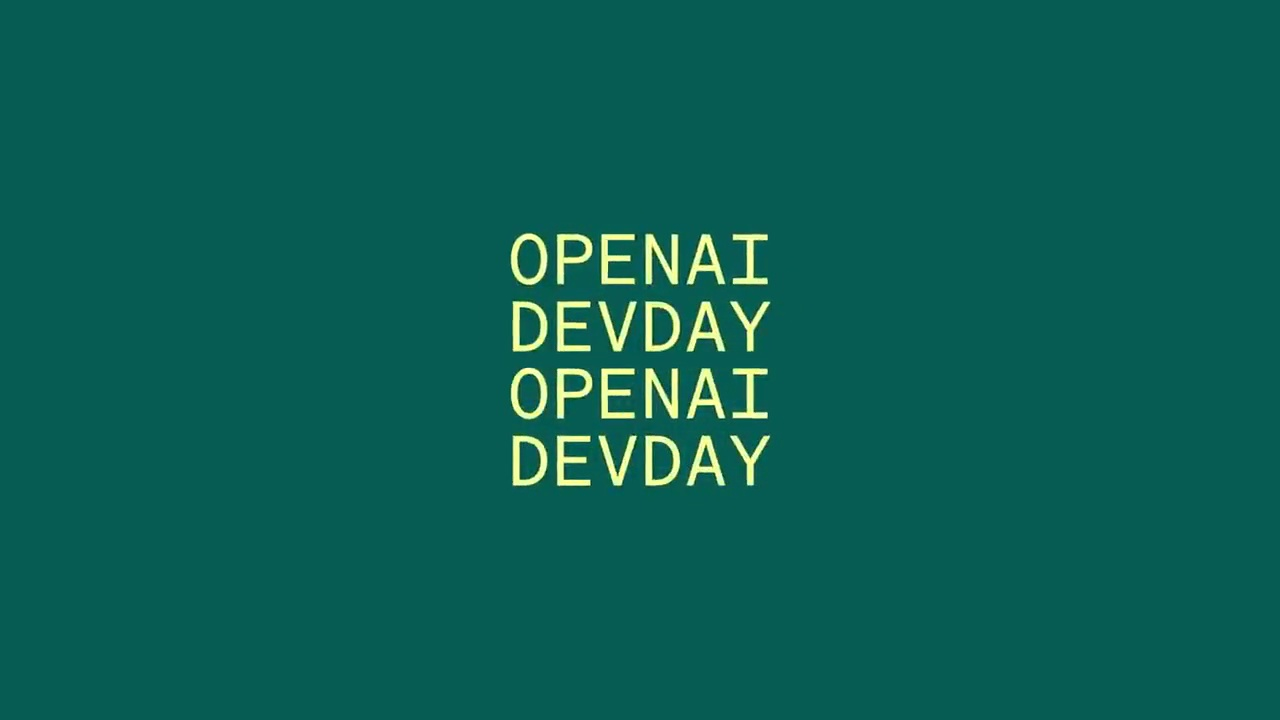

In [6]:
display_handle = display(None, display_id=True)  # 비디오를 표시할 디스플레이 핸들을 생성
for img in base64Frames:  # 추출된 프레임을 하나씩 가져와서 표시
    display_handle.update(Image(data=base64.b64decode(img.encode('utf-8')), width=600))  # 이미지를 표시
    time.sleep(0.1)  # 0.1초 대기

In [7]:
Audio(audio_path)  # 추출된 오디오 파일을 재생

#### 예제 1: 요약
- 이제 비디오 프레임과 오디오가 모두 있으므로 몇 가지 테스트를 실행하여 각각의 경우의 사용한 결과를 비교해보겠습니다. 모델이 비디오의 전체 컨텍스트를 사용할 수 있으므로 시각적 및 오디오 입력의 컨텍스트로 생성된 요약이 가장 정확할 것으로 예상됩니다.

  1. 시각적 요약
  2. 오디오 요약
  3. 시각적 + 오디오 요약

시각적 요약
- 시각적 요약은 비디오의 프레임만 모델에 보내서 생성됩니다. 프레임만 사용하면 모델은 시각적 측면을 포착할 가능성이 있지만 화자가 말한 세부 사항은 놓칠 것입니다.

In [9]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "당신은 비디오 서머리를 합니다. 이 비디오를 요약해주세요. 마크다운 형식으로"},
        {
            "role": "user",
            "content": [
                "이것은 비디오의 프레임들입니다.",
                *map(lambda x: {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{x}", "detail": "low"}}, base64Frames),
            ],
        },
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day Summary

## Overview
The OpenAI Dev Day event showcased new advancements and features in AI technology, particularly focusing on the latest developments in the GPT-4 model and its applications.

## Key Highlights

### Event Introduction
- The event began with an introduction to OpenAI Dev Day, setting the stage for discussions on AI advancements.

### Keynote Recap
- A recap of the keynote presentation highlighted significant updates and features of OpenAI's models.

### New Features
- **GPT-4 Turbo**: Introduction of a more efficient version of GPT-4, emphasizing speed and performance improvements.
- **DALL-E 3**: Updates on the image generation model, showcasing its capabilities in creating high-quality images from text prompts.
- **Custom Models**: Introduction of customizable models that allow users to tailor AI behavior to specific needs.

### Technical Enhancements
- **Function Calling**: Demonstration of how the new function calling feature enhances interaction 

In [10]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "당신은 비디오 서머리를 합니다. 이 비디오를 요약해주세요. 마크다운 형식으로 해주고 한국어로 변역해줏요.",
        },
        {
            "role": "user",
            "content": [
                "이것은 비디오의 프레임들입니다.",
                *map( # *map : *는 map의 결과를 풀어서 전달해줌 - 언패킹
                    lambda x: {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{x}",
                            "detail": "low",
                        },  #map 함수는 여러 요소를 포함한 iterator를 반환, 이 iterator를 *로 풀어서 전달
                    },
                    base64Frames,
                ),
            ],
        },
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day 요약

## 개요
OpenAI Dev Day는 최신 AI 기술과 발전을 공유하는 행사로, 다양한 발표와 데모가 포함되어 있습니다.

## 주요 내용
1. **키노트 발표**:
   - OpenAI의 최신 모델과 기능에 대한 소개.
   - GPT-4 Turbo 및 DALL·E 3의 새로운 기능 강조.

2. **기술적 발전**:
   - **JSON 모드**: 데이터 처리의 효율성을 높이는 새로운 기능.
   - **함수 호출**: 자연어 명령을 코드로 변환하는 기능 소개.

3. **모델 개선**:
   - 더 긴 컨텍스트와 향상된 제어 기능.
   - 더 나은 지식 기반과 사용자 경험 제공.

4. **가격 정책**:
   - GPT-4 Turbo의 가격 및 사용량에 대한 설명.
   - 입력 및 출력 토큰의 효율성 증가.

5. **개발자 도구**:
   - 새로운 API와 사용자 정의 모델 기능 소개.
   - 다양한 GPTs와 그 활용 사례.

6. **커뮤니티와 협업**:
   - 개발자들이 AI를 활용하여 혁신적인 솔루션을 만들 수 있도록 지원하는 방안.

## 결론
OpenAI Dev Day는 AI 기술의 최신 동향을 공유하고, 개발자들이 새로운 도구와 기능을 활용하여 창의적인 프로젝트를 진행할 수 있도록 영감을 주는 행사입니다.

---

# OpenAI Dev Day Summary

## Overview
OpenAI Dev Day is an event that shares the latest AI technologies and advancements, featuring various presentations and demos.

## Key Points
1. **Keynote Presentation**:
   - Introduction of OpenAI's latest models and features.
   - Highlighting new functionalities of GPT-4 Turbo and DAL

결과는 예상대로입니다. 모델은 비디오 비주얼의 높은 수준의 측면을 포착할 수 있지만, 연설에서 제공된 세부 사항은 놓칩니다.

오디오 요약
- 오디오 요약은 모델에 오디오 대본을 보내서 생성됩니다. 오디오만 있는 경우 모델은 오디오 콘텐츠에 편향될 가능성이 높고 프레젠테이션과 비주얼에서 제공하는 맥락을 놓칠 것입니다.

- GPT-4o용 `{audio}` 입력은 현재 사용할 수 없지만 곧 제공될 예정입니다! 지금은 기존의 `whisper-1` 모델을 사용하여 오디오를 처리합니다.

In [11]:
transcription  = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "당신은 오디오 서머리를 합니다. 이 오디오를 요약해주세요. 마크다운 형식으로 해주고 한국어로 변역해줏요."},
        {"role": "user", "content": [
            {"type": "text", "text": transcription.text},
        ],
        }
    ],
)

print(response.choices[0].message.content)

# OpenAI Dev Day 요약

**모델 출시**
- GPT-4 Turbo: 최대 128,000 토큰의 컨텍스트 지원
- JSON 모드: 모델이 유효한 JSON으로 응답
- 여러 기능을 동시에 호출 가능

**지식 접근 개선**
- 외부 문서나 데이터베이스에서 지식을 검색할 수 있는 기능 추가
- GPT-4 Turbo는 2023년 4월까지의 지식 포함

**신기능 및 프로그램**
- DALL-E 3, GPT-4 Turbo with Vision, 새로운 Text-to-Speech 모델이 API에 추가
- Custom Models 프로그램 시작: 연구자들이 기업과 협력하여 맞춤형 모델 개발
- 모든 GPT-4 고객의 토큰 제한을 확대

**비용 절감**
- GPT-4 Turbo는 GPT-4보다 프롬프트 토큰 3배, 완료 토큰 2배 저렴

**GPTs**
- 특정 목적에 맞춘 개인화된 GPTs 출시
- 비코딩 사용자도 대화를 통해 GPT 프로그래밍 가능
- 개인 GPT 공유 가능, 기업 전용 GPT 생성 가능

**API 기능 향상**
- 도움 API에 지속적인 스레드, 내장 검색, 코드 인터프리터 및 강화된 함수 호출 추가

**미래에 대한 기대**
- 통합된 인공지능을 통해 모든 사용자가 슈퍼파워를 갖게 될 것
- 앞으로의 기술 발전에 대한 기대감 표현

**감사 인사**
- 참석자들에게 감사하며 내년에도 다시 참가해줄 것을 요청

---

이 내용은 OpenAI Dev Day에서 발표된 주요 사항들을 정리한 것입니다. 더 나은 기술 발전을 위한 기대와 기여를 강조하였습니다.


In [14]:
# 비디오와 오디오를 함께 사용

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "당신은 서머리를 합니다. 이 비디오와 스크립트 둘다 참고해서 요약해주세요. 마크다운 형식으로 해주고 한국어로 변역해줏요.",
        },
        {
            "role": "user",
            "content": [
                "이것은 비디오의 프레임들입니다.",
                *map(  # *map : *는 map의 결과를 풀어서 전달해줌 - 언패킹
                    lambda x: {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{x}",
                            "detail": "low",
                        },  # map 함수는 여러 요소를 포함한 iterator를 반환, 이 iterator를 *로 풀어서 전달
                    },
                    base64Frames,
                ),
                {"type": "text", "text": transcription.text},
            ],
        },
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day 요약

## 주요 발표 내용
- **GPT-4 Turbo 출시**: 
  - 최대 128,000 토큰의 컨텍스트 지원.
  - JSON 모드 기능 추가: 모델이 유효한 JSON으로 응답하도록 보장.
  - 여러 기능을 동시에 호출할 수 있으며, 지침을 더 잘 따를 수 있음.

- **지식 검색 기능**: 
  - 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 기능 추가.
  - GPT-4 Turbo는 2023년 4월까지의 세계 지식 보유.

- **API 업데이트**: 
  - DALL·E 3, GPT-4 Turbo with Vision, 새로운 텍스트-음성 변환 모델이 API에 추가됨.
  - **커스텀 모델 프로그램**: 기업 맞춤형 모델 개발 지원.

- **요금 인하**: 
  - GPT-4 Turbo는 GPT-4보다 프롬프트 토큰 3배, 완료 토큰 2배 저렴.

- **GPTs 소개**: 
  - 특정 목적에 맞춘 맞춤형 ChatGPT.
  - 코드 없이 대화만으로 GPT를 프로그래밍할 수 있는 기능 제공.
  - 개인 GPT 생성 및 공유 가능.

- **어시스턴스 API**: 
  - 지속적인 스레드, 내장 검색, 코드 해석기, 개선된 기능 호출 포함.

## 결론
OpenAI는 새로운 기술을 통해 사용자에게 더 나은 도구를 제공하고, 향후 더 많은 혁신을 기대하고 있습니다. 참석자들에게 감사의 인사를 전하며, 내년에도 더 발전된 모습으로 돌아올 것을 약속했습니다.

---

# OpenAI Dev Day Summary (Korean Translation)

## 주요 발표 내용
- **GPT-4 Turbo 출시**: 
  - 최대 128,000 토큰의 컨텍스트 지원.
  - JSON 모드 기능 추가: 모델이 유효한 JSON으로 응답하도록 보장.
  - 여러 기능을 동시에 호출할 수 있으며, 지침을 더 잘 따를 수 있음.

- **지식 검색 기능**: 
  - 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 

In [13]:
# 비디오만 사용

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "당신은 비디오 서머리를 합니다. 이 비디오를 요약해주세요. 마크다운 형식으로 해주고 한국어로 변역해줏요.",
        },
        {
            "role": "user",
            "content": [
                "이것은 비디오의 프레임들입니다.",
                *map(  # *map : *는 map의 결과를 풀어서 전달해줌 - 언패킹
                    lambda x: {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{x}",
                            "detail": "low",
                        },  # map 함수는 여러 요소를 포함한 iterator를 반환, 이 iterator를 *로 풀어서 전달
                    },
                    base64Frames,
                ),
            ],
        },
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day 요약

## 개요
OpenAI Dev Day는 OpenAI의 최신 기술과 발전을 소개하는 행사로, 다양한 발표와 데모가 포함되어 있습니다.

## 주요 내용
1. **개회사 및 소개**
   - OpenAI Dev Day의 시작과 목적에 대한 설명.

2. **주요 발표**
   - **GPT-4 Turbo**: 새로운 모델의 성능과 기능에 대한 설명.
   - **DALL·E 3**: 이미지 생성 모델의 발전과 활용 사례.
   - **API 및 가격 정책**: API 사용에 대한 새로운 가격 정책과 기능 설명.

3. **기능 시연**
   - **JSON 모드**: 데이터 처리 및 응답 형식에 대한 새로운 기능.
   - **함수 호출**: 자연어 명령을 통해 함수 호출을 간소화하는 방법.

4. **기술적 발전**
   - **스레딩 및 검색 기능**: 대화의 맥락을 유지하고 정보를 검색하는 새로운 방법.
   - **코드 해석기**: 코드 실행 및 해석을 위한 새로운 도구.

5. **커스터마이징**
   - 사용자 맞춤형 모델 생성 및 활용 방법.

6. **Q&A 세션**
   - 참석자들과의 질의응답 시간.

## 결론
OpenAI Dev Day는 최신 AI 기술의 발전을 공유하고, 개발자들이 새로운 도구와 기능을 활용할 수 있도록 돕는 중요한 행사입니다.

---

# OpenAI Dev Day Summary (Korean Translation)

## 개요
OpenAI Dev Day는 OpenAI의 최신 기술과 발전을 소개하는 행사로, 다양한 발표와 데모가 포함되어 있습니다.

## 주요 내용
1. **개회사 및 소개**
   - OpenAI Dev Day의 시작과 목적에 대한 설명.

2. **주요 발표**
   - **GPT-4 Turbo**: 새로운 모델의 성능과 기능에 대한 설명.
   - **DALL·E 3**: 이미지 생성 모델의 발전과 활용 사례.
   - **API 및 가격 정책**: API 사용에

오디오 요약은 연설 중에 논의된 내용에 편향되어 있지만 비디오 요약보다 구조가 훨씬 부족합니다.

오디오 + 비주얼 요약
- 오디오 + 비주얼 요약은 모델에 비디오의 비주얼과 오디오를 동시에 보내서 생성됩니다. 둘 다 보낼 때 모델은 전체 비디오를 한 번에 인식할 수 있으므로 더 잘 요약할 것으로 예상됩니다.
- 비디오와 오디오를 모두 결합한 후, 비디오의 시각적 요소와 오디오 요소에서 정보를 사용하여 이벤트에 대한 훨씬 더 자세하고 포괄적인 요약을 얻을 수 있습니다.

비디오와 오디오 요약

# OpenAI Dev Day 요약

## 주요 발표 내용
- **GPT-4 Turbo 출시**: 
  - 최대 128,000 토큰의 컨텍스트 지원.
  - JSON 모드 기능 추가: 모델이 유효한 JSON으로 응답하도록 보장.
  - 여러 기능을 동시에 호출할 수 있으며, 지침을 더 잘 따를 수 있음.

- **지식 검색 기능**: 
  - 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 기능 추가.
  - GPT-4 Turbo는 2023년 4월까지의 세계 지식 보유.

- **API 업데이트**: 
  - DALL·E 3, GPT-4 Turbo with Vision, 새로운 텍스트-음성 변환 모델이 API에 추가됨.
  - **커스텀 모델 프로그램**: 기업 맞춤형 모델 개발 지원.

- **요금 인하**: 
  - GPT-4 Turbo는 GPT-4보다 프롬프트 토큰 3배, 완료 토큰 2배 저렴.

- **GPTs 소개**: 
  - 특정 목적에 맞춘 맞춤형 ChatGPT.
  - 코드 없이 대화만으로 GPT를 프로그래밍할 수 있는 기능 제공.
  - 개인 GPT 생성 및 공유 가능.

- **어시스턴스 API**: 
  - 지속적인 스레드, 내장 검색, 코드 해석기, 개선된 기능 호출 포함.

## 결론
OpenAI는 새로운 기술을 통해 사용자에게 더 나은 도구를 제공하고, 향후 더 많은 혁신을 기대하고 있습니다. 참석자들에게 감사의 인사를 전하며, 내년에도 더 발전된 모습으로 돌아올 것을 약속했습니다.

---
# OpenAI Dev Day 요약

## 개요
OpenAI Dev Day는 OpenAI의 최신 기술과 발전을 소개하는 행사로, 다양한 발표와 데모가 포함되어 있습니다.

## 주요 내용
1. **개회사 및 소개**
   - OpenAI Dev Day의 시작과 목적에 대한 설명.

2. **주요 발표**
   - **GPT-4 Turbo**: 새로운 모델의 성능과 기능에 대한 설명.
   - **DALL·E 3**: 이미지 생성 모델의 발전과 활용 사례.
   - **API 및 가격 정책**: API 사용에 대한 새로운 가격 정책과 기능 설명.

3. **기능 시연**
   - **JSON 모드**: 데이터 처리 및 응답 형식에 대한 새로운 기능.
   - **함수 호출**: 자연어 명령을 통해 함수 호출을 간소화하는 방법.

4. **기술적 발전**
   - **스레딩 및 검색 기능**: 대화의 맥락을 유지하고 정보를 검색하는 새로운 방법.
   - **코드 해석기**: 코드 실행 및 해석을 위한 새로운 도구.

5. **커스터마이징**
   - 사용자 맞춤형 모델 생성 및 활용 방법.

6. **Q&A 세션**
   - 참석자들과의 질의응답 시간.

## 결론
OpenAI Dev Day는 최신 AI 기술의 발전을 공유하고, 개발자들이 새로운 도구와 기능을 활용할 수 있도록 돕는 중요한 행사입니다.


#### 예제 2: 질의응답

Q&A의 경우, 이전과 동일한 개념을 사용하여 처리된 비디오에 질문을 하고 동일한 3가지 테스트를 실행하여 입력 모달리티를 결합하는 이점을 보여줍니다.
1. 시각적 Q&A
2. 오디오 Q&A
3. 시각적 + 오디오 Q&A
bidiowa odioleul modu gyeolhabha

In [16]:
QUESTION = "질문: 샘알트만은 창문을 올리고, 라디오 주파수를 맞추는 예를 왜 들었을까요?"

In [17]:
# 비디오만 사용

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "당신은 비디오 서머리를 합니다. 이 비디오를 요약해주세요. 마크다운 형식으로 해주고 한국어로 변역해줏요.",
        },
        {
            "role": "user",
            "content": [
                "이것은 비디오의 프레임들입니다.",
                *map(  # *map : *는 map의 결과를 풀어서 전달해줌 - 언패킹
                    lambda x: {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{x}",
                            "detail": "low",
                        },  # map 함수는 여러 요소를 포함한 iterator를 반환, 이 iterator를 *로 풀어서 전달
                    },
                    base64Frames,
                ),
                QUESTION
            ],
        },
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

샘 알트만이 창문을 올리고 라디오 주파수를 맞추는 예를 든 이유는, 새로운 기능이나 기술이 어떻게 더 자연스럽고 직관적으로 작동할 수 있는지를 설명하기 위해서입니다. 이러한 예시는 사용자가 일상적인 언어로 명령을 내릴 수 있는 가능성을 보여주며, AI가 이러한 명령을 이해하고 실행할 수 있는 능력을 강조합니다. 이는 AI의 발전이 사용자와의 상호작용을 더욱 원활하게 만들고, 기술을 더 쉽게 사용할 수 있도록 한다는 점을 부각시키기 위한 것입니다.


In [26]:
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "당신은 오디오 서머리를 합니다. 이 오디오를 요약해주세요. 마크다운 형식으로 해주고 한국어로 변역해줏요.",
        },
        {
            "role": "user",
            "content": [
                {"type": "text", "text": transcription.text},
            ],
        },
        {
            "role": "user",
            "content": [
                {"type": "text", "text": QUESTION},
            ],
        },
    ],
)

print(response.choices[0].message.content)

샘 알트만이 창문을 올리고, 라디오 주파수를 맞추는 예를 든 것은 아마도 새로운 모델이나 기술이 사용자와 어떻게 상호작용할 수 있는지를 비유적으로 설명하기 위해서일 것입니다. 이러한 비유는 사용자가 기술을 통해 더욱 명확하고 원활한 연결과 커뮤니케이션을 이룰 수 있다는 메시지를 전달하려는 의도로 보입니다. 창문을 통해 외부 세계와 소통하는 것처럼, 기술을 활용하면 더 많은 정보와 지식을 쉽게 접근할 수 있는 방법을 제공할 수 있다는 점을 강조하고자 한 것일 수 있습니다. 

혹시 더 구체적인 맥락이나 추가적인 정보를 원하신다면, 알려주세요!


In [29]:
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "당신은  이 오디오를 요약해서 질문에 답하시오. 마크다운 형식으로 해주고 한국어로 변역해주세요.",
        },
        {
            "role": "user",
            "content": f"{transcription.text}, {QUESTION}",
        },
        
    ],
)

print(response.choices[0].message.content)

## 샘 알트먼의 예시 설명

샘 알트먼은 창문을 올리고, 라디오 주파수를 맞추는 예시를 통해 기술의 발전과 사용자 경험을 강조하고자 했습니다. 이러한 비유는 기술이 얼마나 사용자 친화적이고 접근 가능하게 발전해야 하는지를 나타냅니다. 

- **창문 올리기**: 사용자가 명확히 필요로 하는 정보를 얻기 위해 창문을 열어 바깥 세상을 바라보는 행위로 비유되었습니다. 이는 더 나은 정보 접근이 가능해져야 한다는 점을 시사합니다.

- **라디오 주파수 맞추기**: 적절한 주파수를 맞추어야 원하는 방송을 들을 수 있다는 것을 강조하며, 사용자가 자신의 요구에 맞는 정보를 쉽게 얻을 수 있도록 기술이 개선되어야 한다는 의미를 내포합니다.

이 예시는 사용자의 편의와 기술의 본질적인 목적, 즉 보다 직관적이고 유용한 도구로 발전해야 한다는 점을 전달하는 데 목적이 있습니다.


In [31]:
# 비디오와 오디오를 함께 사용

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "당신이 비디오와 스크립트 둘다 참고해서 질문에 답해주세요. 마크다운 형식으로 해주고 한국어로 말해주세요.",
        },
        {
            "role": "user",
            "content": [
                "이것은 비디오의 프레임들입니다.",
                *map(  # *map : *는 map의 결과를 풀어서 전달해줌 - 언패킹
                    lambda x: {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{x}",
                            "detail": "low",
                        },  # map 함수는 여러 요소를 포함한 iterator를 반환, 이 iterator를 *로 풀어서 전달
                    },
                    base64Frames,
                ),
                {"type": "text", "text": transcription.text},
                QUESTION
            ],
        },
    ],
    temperature=0.0,
)
print(response.choices[0].message.content)

샘 알트만이 창문을 올리고 라디오 주파수를 맞추는 예를 든 이유는, 새로운 기능이나 모델이 어떻게 작동하는지를 설명하기 위해서입니다. 이 예시는 사용자가 자연어로 명령을 내리면, 시스템이 이를 이해하고 적절한 기능을 호출하는 과정을 보여줍니다. 즉, 사용자가 복잡한 명령을 내리더라도 시스템이 이를 효과적으로 처리할 수 있다는 점을 강조하기 위한 것입니다. 이러한 방식은 사용자에게 더 직관적이고 편리한 경험을 제공하기 위한 노력의 일환으로 볼 수 있습니다.


비디오/오디오 요약:

이번 OpenAI Dev Day에서는 새로운 모델인 GPT-4 Turbo가 출시되었습니다. 이 모델은 최대 128,000개의 토큰을 지원하며, JSON 모드라는 새로운 기능이 추가되어 모델이 유효한 JSON으로 응답할 수 있습니다. 여러 기능을 동시에 호출할 수 있으며, 일반적으로 지침을 더 잘 따릅니다. 또한, 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 검색 기능이 도입되었습니다. GPT-4 Turbo는 2023년 4월까지의 세계에 대한 지식을 가지고 있으며, 지속적으로 개선될 예정입니다.

DALL·E 3, GPT-4 Turbo with Vision, 그리고 새로운 텍스트 음성 변환 모델이 API에 추가되었습니다. Custom Models 프로그램도 시작되어, 연구자들이 기업과 협력하여 맞춤형 모델을 개발할 수 있도록 지원합니다. 모든 기존 GPT-4 고객의 경우 분당 토큰 수가 두 배로 증가하여 더 많은 작업을 수행할 수 있게 되며, API 계정 설정에서 추가적인 속도 제한 및 쿼터 변경 요청이 가능합니다.

GPT-4 Turbo는 프롬프트 토큰에 대해 3배, 완료 토큰에 대해 2배 저렴해졌습니다. GPT는 특정 목적에 맞춘 ChatGPT의 맞춤형 버전으로, 지침, 확장된 지식, 행동을 결합하여 더 유용하게 사용할 수 있습니다. 코딩을 모르는 사용자도 대화만으로 GPT를 프로그래밍할 수 있으며, 개인 GPT를 만들거나 공개 링크를 통해 공유할 수 있습니다. 

API에도 같은 개념이 적용되어, 지속적인 스레드, 내장 검색, 코드 해석기, 개선된 기능 호출 등이 포함된 Assistance API가 제공됩니다. 이러한 기술이 통합됨에 따라, 모든 사용자가 즉시 슈퍼파워를 가질 수 있게 될 것입니다. 

마지막으로, 오늘 발표된 내용은 앞으로 개발될 기술에 비해 매우 간단하게 느껴질 것이라고 하며, 참석자들에게 감사의 인사를 전했습니다.